In [1]:
# Import Required Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score
)

In [6]:
# Load Dataset
df = pd.read_csv('loan_approval_dataset.csv')
print("Original DataFrame:")
df

Original DataFrame:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [8]:
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [9]:
print(df.isna().sum())


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [11]:
print(df.duplicated().sum())


0


In [12]:
print(df.describe())


           loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.20000

In [13]:
print(df.columns.tolist())


['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [14]:
# Data Understanding & Preprocessing
print("\n--- Data Preprocessing and Understanding ---")

# Strip column names from spaces
df.columns = df.columns.str.strip()
print("Columns after stripping whitespace:", df.columns.tolist())

# Drop irrelevant column
df = df.drop(columns=['loan_id'])

# Identify categorical and numerical columns
categorical_cols = [col for col in df.columns if df[col].dtype == 'O']
numerical_cols = df.select_dtypes(include=['int64','float64']).columns



--- Data Preprocessing and Understanding ---
Columns after stripping whitespace: ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [15]:
# Print unique values for categorical columns
print("\nCategorical columns & their unique values:")
for col in categorical_cols:
    print(f'{col} : {df[col].unique()}')

# Print percentage distribution of categories
print("\nPercentage distribution of categories:")
for col in categorical_cols:
    print(f"\n{col}:\n{df[col].value_counts(normalize=True)*100}")


Categorical columns & their unique values:
education : [' Graduate' ' Not Graduate']
self_employed : [' No' ' Yes']
loan_status : [' Approved' ' Rejected']

Percentage distribution of categories:

education:
education
Graduate        50.222535
Not Graduate    49.777465
Name: proportion, dtype: float64

self_employed:
self_employed
Yes    50.363083
No     49.636917
Name: proportion, dtype: float64

loan_status:
loan_status
Approved    62.215976
Rejected    37.784024
Name: proportion, dtype: float64


In [16]:
# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Feature Engineering: Debt-to-Income Ratio
df['debt_to_income'] = df['loan_amount'] / df['income_annum']

# Drop original columns used for the ratio
df = df.drop(columns=['loan_amount', 'income_annum'])


In [17]:
# Scale numerical features
numerical_cols_after_fe = df.select_dtypes(include=['int64','float64']).columns
scaler = MinMaxScaler()
df[numerical_cols_after_fe] = scaler.fit_transform(df[numerical_cols_after_fe])

print("\nProcessed DataFrame head:")
print(df.head())



Processed DataFrame head:
   no_of_dependents  education  self_employed  loan_term  cibil_score  \
0               0.4        0.0            0.0   0.555556     0.796667   
1               0.0        1.0            1.0   0.333333     0.195000   
2               0.6        0.0            0.0   1.000000     0.343333   
3               0.6        0.0            0.0   0.333333     0.278333   
4               1.0        1.0            1.0   1.000000     0.136667   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                  0.085616                 0.907216             0.575835   
1                  0.095890                 0.113402             0.218509   
2                  0.246575                 0.231959             0.848329   
3                  0.626712                 0.170103             0.591260   
4                  0.428082                 0.422680             0.748072   

   bank_asset_value  loan_status  debt_to_income  
0          0.544218 


--- Exploratory Data Analysis (EDA) ---

Generating histograms for numerical features...


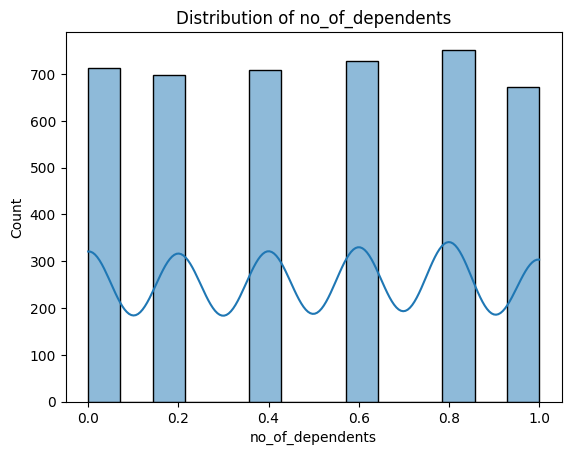

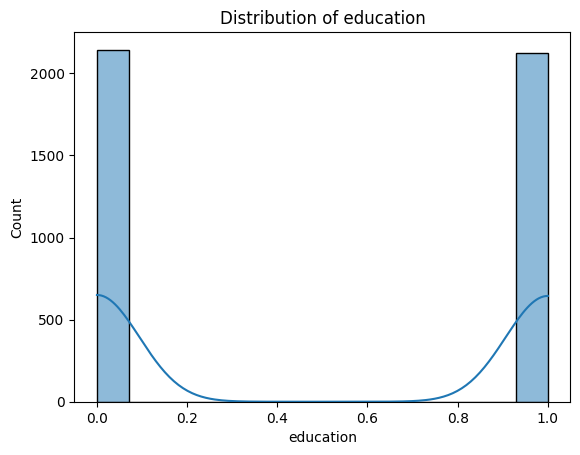

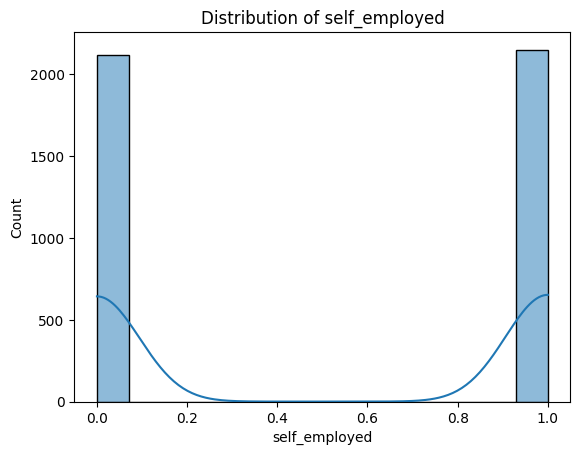

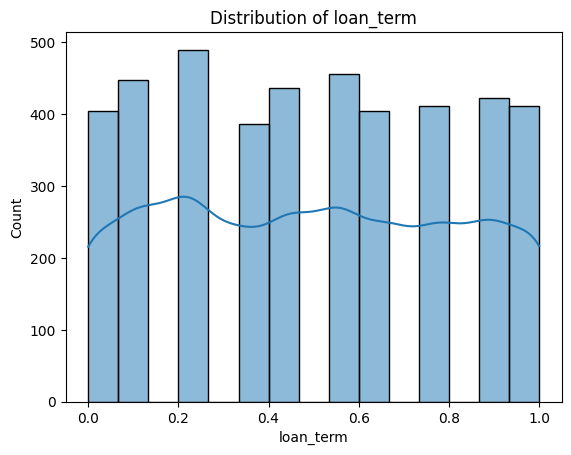

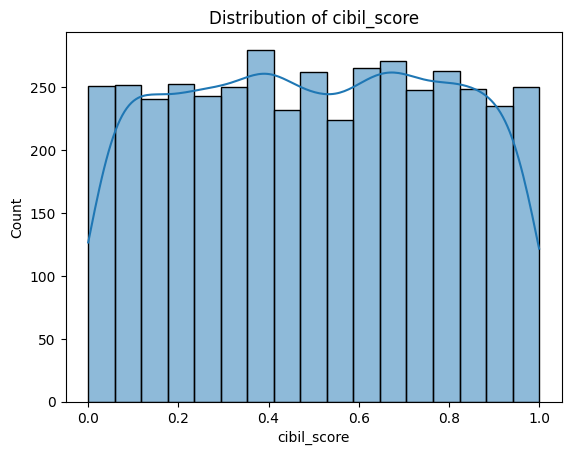

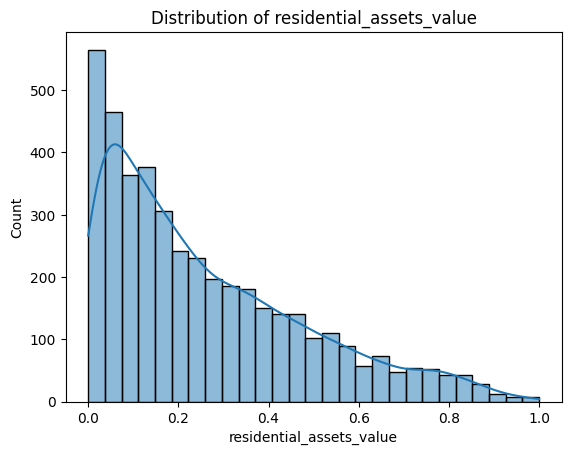

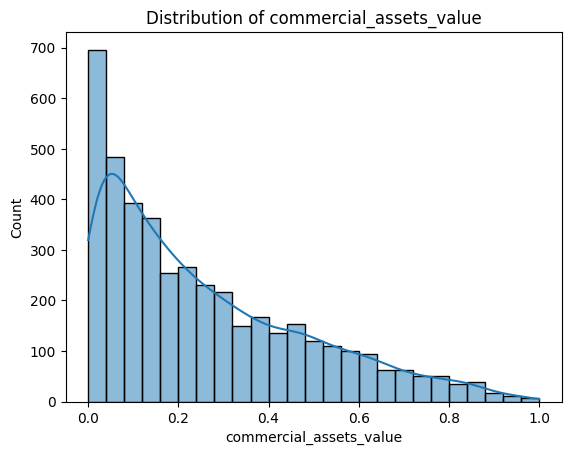

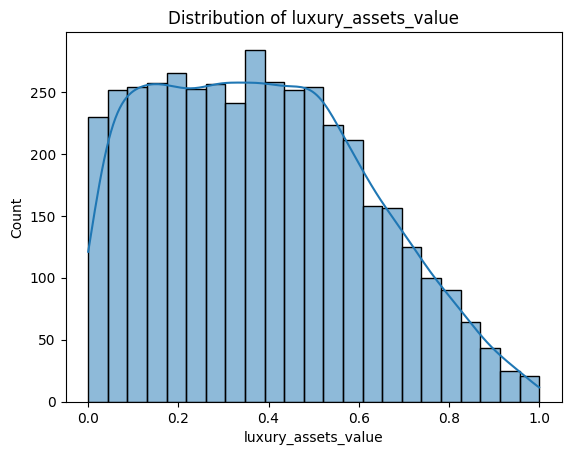

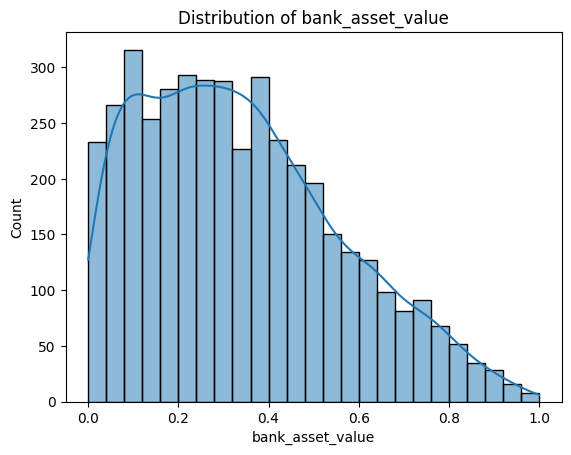

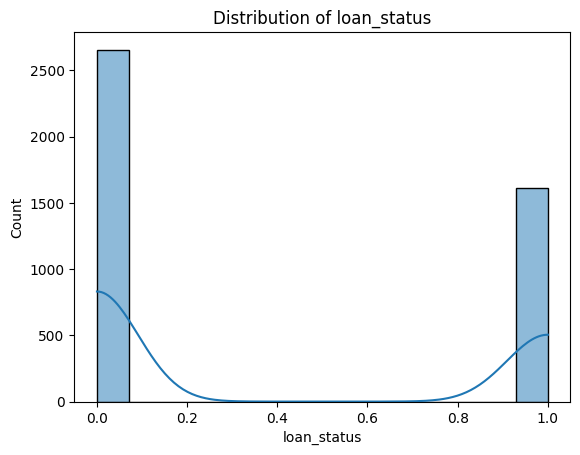

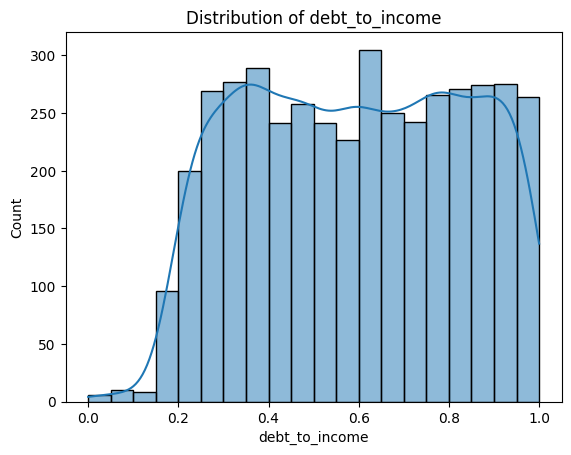

In [18]:
# --- Exploratory Data Analysis (EDA) ---
print("\n--- Exploratory Data Analysis (EDA) ---")

# Histograms for numeric features
print("\nGenerating histograms for numerical features...")
for col in numerical_cols_after_fe:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



Generating boxplots for numerical features...


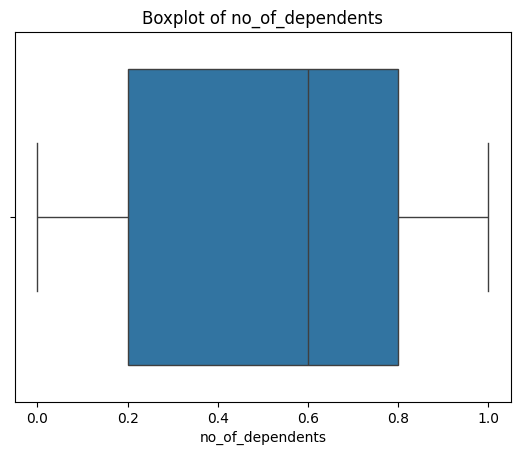

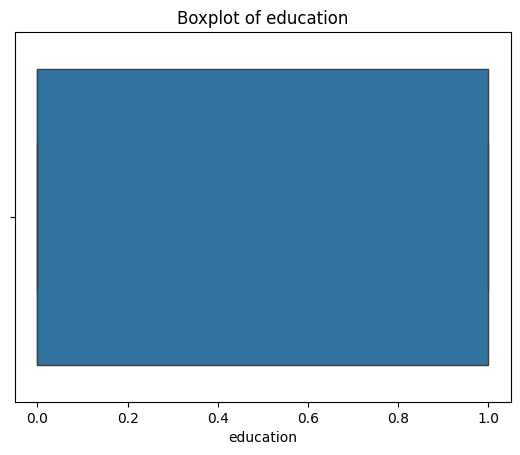

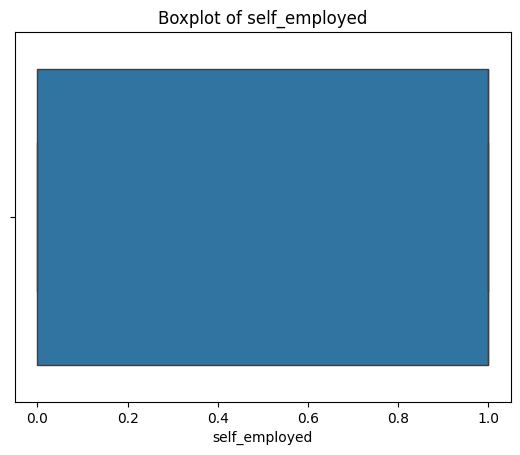

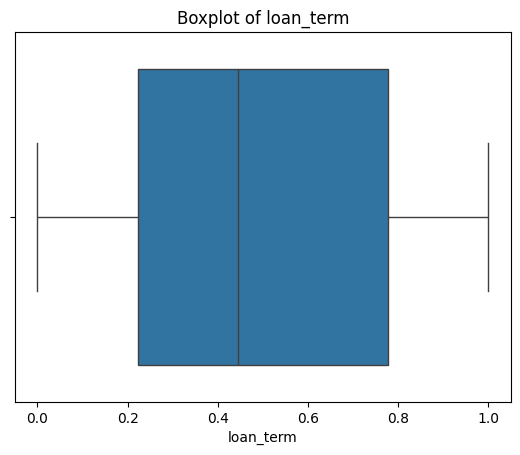

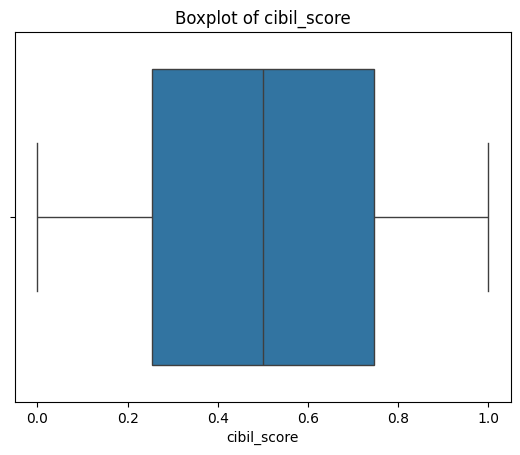

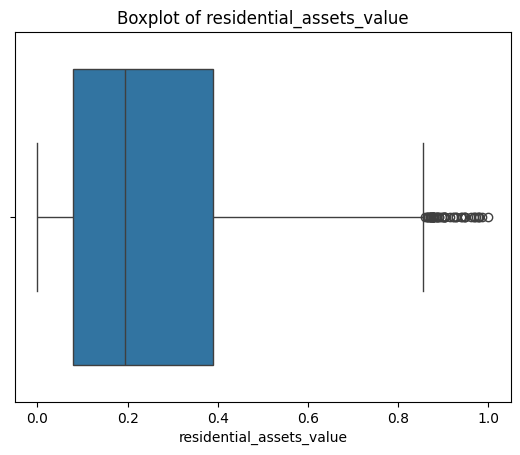

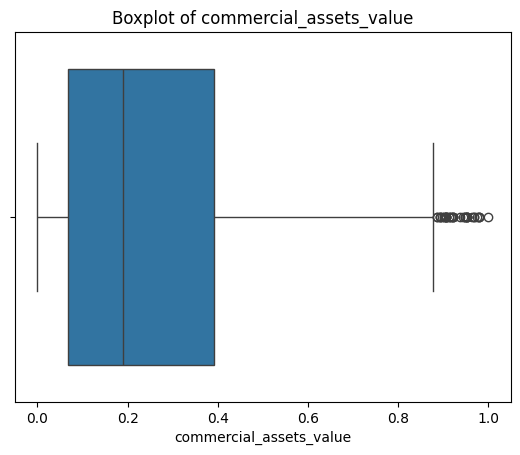

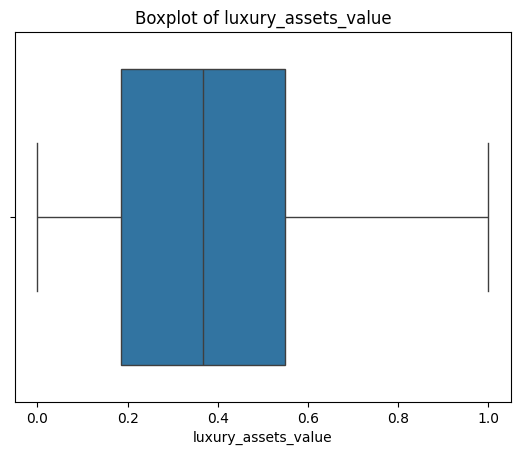

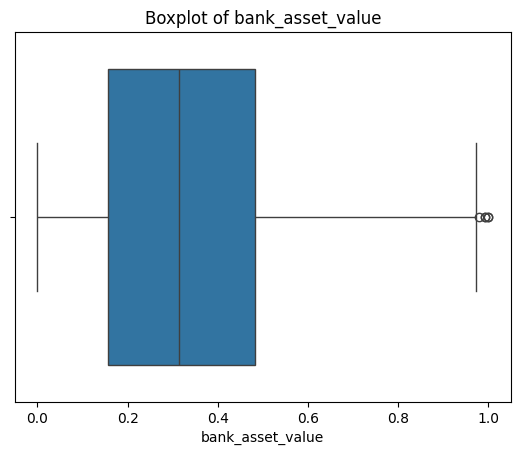

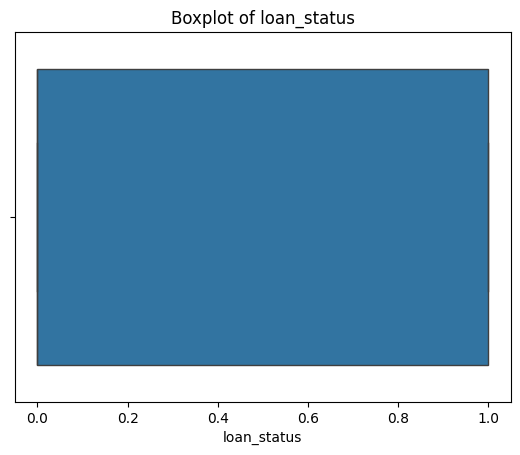

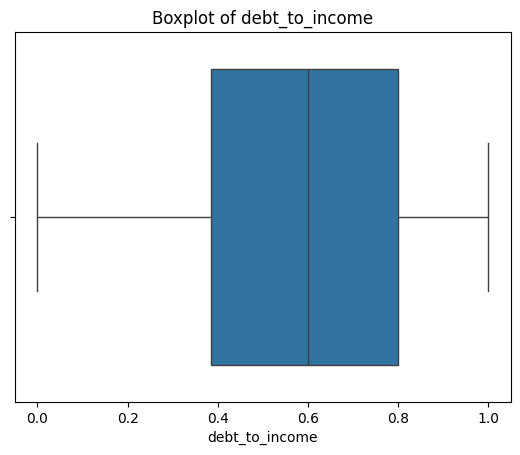

In [19]:
# Boxplots for numerical features
print("\nGenerating boxplots for numerical features...")
for col in numerical_cols_after_fe:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Plotting relationships between categorical features and loan status...


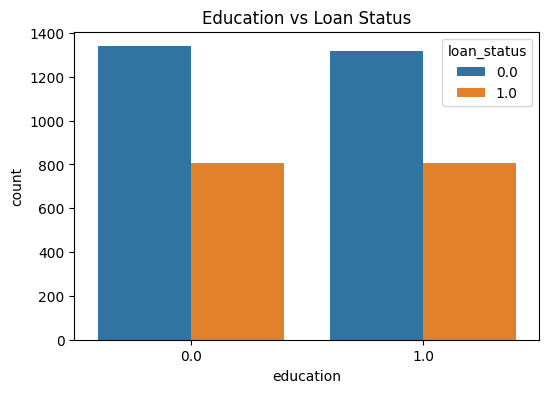

In [20]:
# Plotting categorical vs loan status
print("\nPlotting relationships between categorical features and loan status...")
plt.figure(figsize=(6,4))
sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Education vs Loan Status')
plt.show()



Plotting relationships between categorical features and loan status...


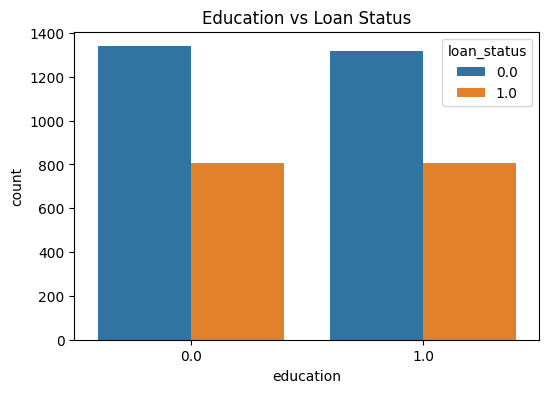

In [21]:
# Plotting categorical vs loan status
print("\nPlotting relationships between categorical features and loan status...")
plt.figure(figsize=(6,4))
sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Education vs Loan Status')
plt.show()


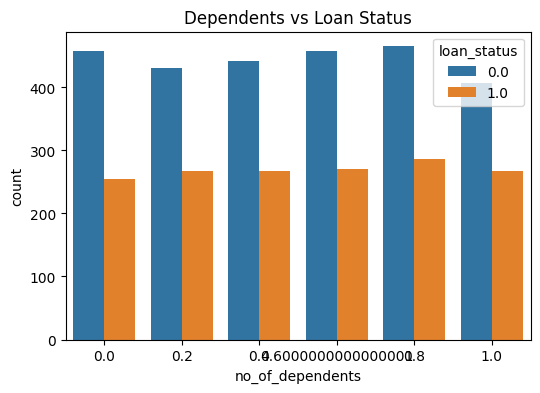

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='no_of_dependents', hue='loan_status', data=df)
plt.title('Dependents vs Loan Status')
plt.show()

In [23]:
# Crosstab of education and loan status
print("\nCrosstab of education and loan status:")
edu_loan = pd.crosstab(df['education'], df['loan_status'], normalize='index') * 100
print(edu_loan)


Crosstab of education and loan status:
loan_status        0.0        1.0
education                        
0.0          62.453358  37.546642
1.0          61.976471  38.023529



Correlation Matrix (Updated) after Feature Engineering:


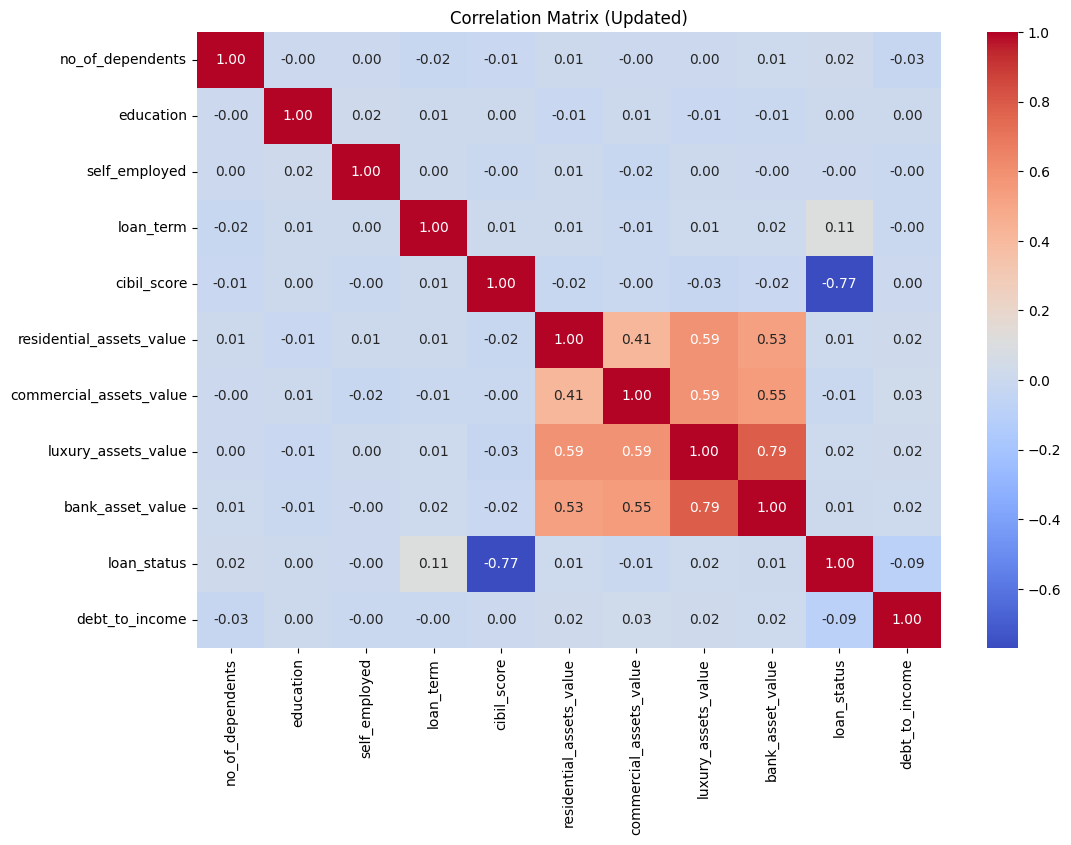

In [24]:
# Correlation heatmap after feature engineering
print("\nCorrelation Matrix (Updated) after Feature Engineering:")
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Updated)")
plt.show()

In [25]:
# --- Model Training and Evaluation ---
print("\n--- Model Training and Evaluation ---")

# Define features (X) and target (y)
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


--- Model Training and Evaluation ---



--- Logistic Regression ---
Cross-validation scores: [0.90629575 0.90775988 0.9238653  0.91654466 0.93850659]
Mean CV accuracy: 0.9185944363103953
Test Accuracy: 0.8992974238875878


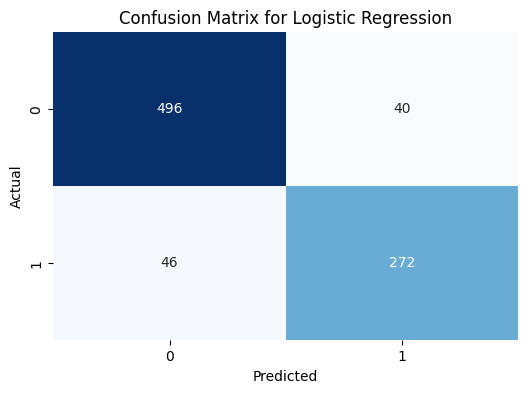

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       536
         1.0       0.87      0.86      0.86       318

    accuracy                           0.90       854
   macro avg       0.89      0.89      0.89       854
weighted avg       0.90      0.90      0.90       854


--- Decision Tree ---
Cross-validation scores: [0.9897511  0.98828697 0.9897511  0.99267936 0.99707174]
Mean CV accuracy: 0.9915080527086383
Test Accuracy: 0.9976580796252927


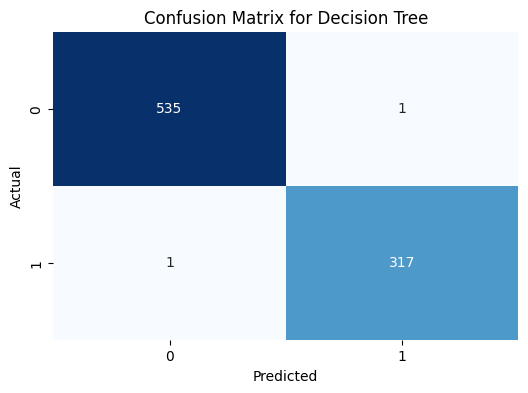

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       536
         1.0       1.00      1.00      1.00       318

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854


--- Random Forest ---
Cross-validation scores: [0.99560761 0.99560761 0.99560761 0.99560761 0.99707174]
Mean CV accuracy: 0.995900439238653
Test Accuracy: 0.9988290398126464


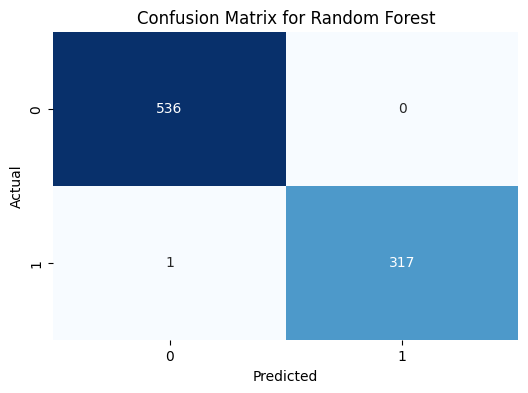

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       536
         1.0       1.00      1.00      1.00       318

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854


--- K-Nearest Neighbors ---
Cross-validation scores: [0.90775988 0.89604685 0.93118594 0.91508053 0.91947291]
Mean CV accuracy: 0.9139092240117129
Test Accuracy: 0.9192037470725996


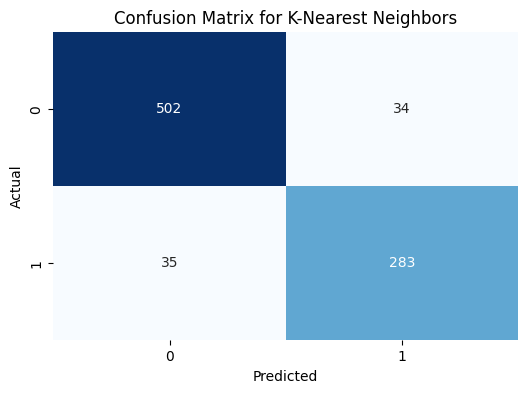

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       536
         1.0       0.89      0.89      0.89       318

    accuracy                           0.92       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.92      0.92      0.92       854



In [26]:
# Dictionary to store models and their results
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for name, model in models.items():
    print(f"\n--- {name} ---")
    
    # Cross-validation on training data
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print("Cross-validation scores:", cv_scores)
    print("Mean CV accuracy:", cv_scores.mean())
    
    # Train model on full training data
    model.fit(X_train, y_train)
    
    # Evaluate on test data
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_accuracy)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

Class Distribution (Before SMOTE):
loan_status
0.0    62.215976
1.0    37.784024
Name: proportion, dtype: float64


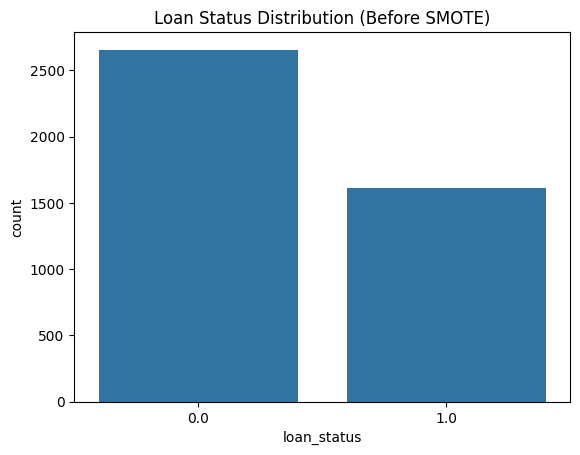

In [27]:
# Check Class Distribution
# ====================================
print("Class Distribution (Before SMOTE):")
print(y.value_counts(normalize=True) * 100)

sns.countplot(x=y)
plt.title("Loan Status Distribution (Before SMOTE)")
plt.show()

Class Distribution (After SMOTE):
loan_status
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


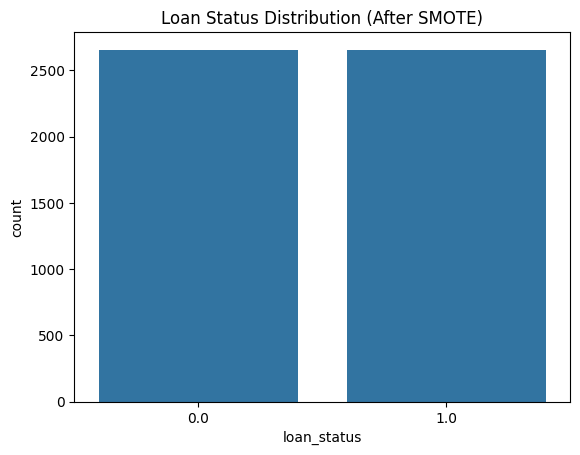

In [28]:
# Apply SMOTE Oversampling
# ====================================
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class Distribution (After SMOTE):")
print(y_resampled.value_counts(normalize=True) * 100)

sns.countplot(x=y_resampled)
plt.title("Loan Status Distribution (After SMOTE)")
plt.show()

In [29]:
# Train-Test Split (After SMOTE)
# ====================================
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [30]:
# Function to Train & Evaluate Models
# ====================================
def evaluate_model(model, model_name):
    print(f"\n===== {model_name} =====")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print("Cross-validation scores:", cv_scores)
    print("Mean CV accuracy:", cv_scores.mean(), '\n')
    
    # Train on full training set
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Accuracy
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    # Classification Report
    print(classification_report(y_test, y_pred))



===== Logistic Regression =====
Cross-validation scores: [0.93176471 0.92352941 0.92       0.93411765 0.94110718]
Mean CV accuracy: 0.9301037899258644 

Test Accuracy: 0.929444967074318


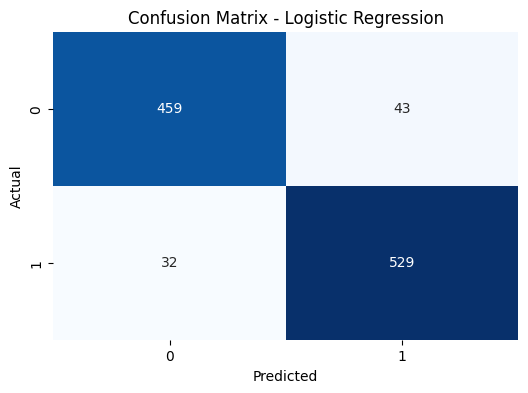

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       502
         1.0       0.92      0.94      0.93       561

    accuracy                           0.93      1063
   macro avg       0.93      0.93      0.93      1063
weighted avg       0.93      0.93      0.93      1063


===== Decision Tree =====
Cross-validation scores: [0.99647059 0.99058824 0.99411765 0.99176471 0.99764429]
Mean CV accuracy: 0.9941170927735051 

Test Accuracy: 0.9905926622765757


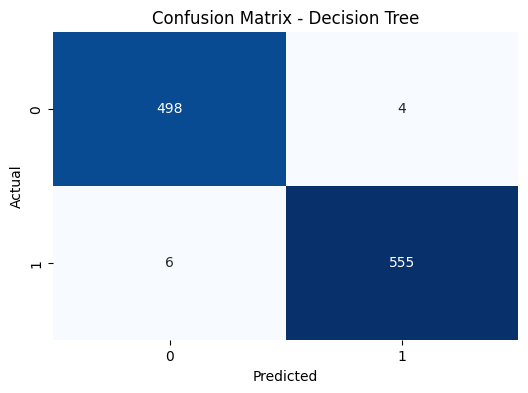

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       502
         1.0       0.99      0.99      0.99       561

    accuracy                           0.99      1063
   macro avg       0.99      0.99      0.99      1063
weighted avg       0.99      0.99      0.99      1063


===== Random Forest =====
Cross-validation scores: [0.99882353 0.99176471 0.99411765 0.99411765 0.99764429]
Mean CV accuracy: 0.9952935633617404 

Test Accuracy: 0.9943555973659455


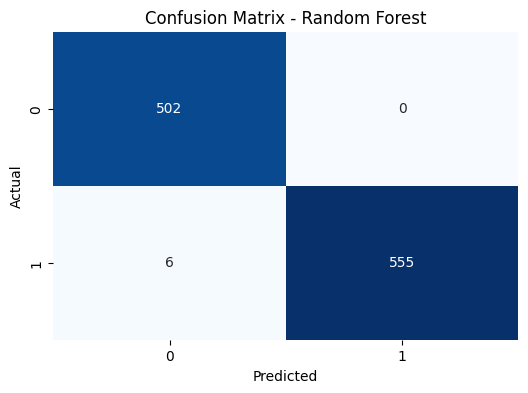

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       502
         1.0       1.00      0.99      0.99       561

    accuracy                           0.99      1063
   macro avg       0.99      0.99      0.99      1063
weighted avg       0.99      0.99      0.99      1063


===== K-Nearest Neighbors =====
Cross-validation scores: [0.91882353 0.92470588 0.91411765 0.92       0.9246172 ]
Mean CV accuracy: 0.9204528511051064 

Test Accuracy: 0.9275634995296331


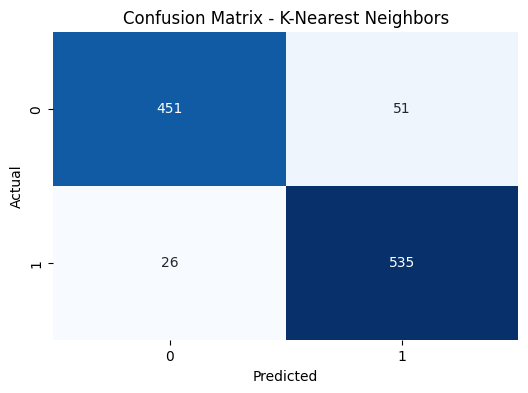

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92       502
         1.0       0.91      0.95      0.93       561

    accuracy                           0.93      1063
   macro avg       0.93      0.93      0.93      1063
weighted avg       0.93      0.93      0.93      1063



In [31]:
# Compare Different Models After SMOTE
# ====================================
evaluate_model(LogisticRegression(max_iter=1000), "Logistic Regression")
evaluate_model(DecisionTreeClassifier(), "Decision Tree")
evaluate_model(RandomForestClassifier(), "Random Forest")
evaluate_model(KNeighborsClassifier(), "K-Nearest Neighbors")